In [47]:
import requests
url = "http://api.coincap.io/v2/assets"
r = requests.get(url)
r
      

<Response [200]>

In [48]:
data = r.json()
data.keys()

dict_keys(['data', 'timestamp'])

In [49]:
import pandas as pd

df = pd.DataFrame(data["data"])
df.head(20)

,id,rank,symbol,name,supply,maxSupply,marketCapUsd,volumeUsd24Hr,priceUsd,changePercent24Hr,vwap24Hr,explorer
0,bitcoin,1,BTC,Bitcoin,19794440.0000000000000000,21000000.0000000000000000,1997140657278.3414606087248000,19097822071.5823952565872847,100894.0216181079869200,3.0391930152924280,100470.9146472849190416,https://blockchain.info/
1,ethereum,2,ETH,Ethereum,120445329.2295306500000000,None,472436513291.1729575130884066,12957657812.3265072908112286,3922.4145619699257373,6.0932128614616674,3817.9658812051424225,https://etherscan.io/
2,tether,3,USDT,Tether,139742488654.3256000000000000,None,139770768976.5254818114550636,44278022962.7047733181489747,1.0002023745424331,-0.0293738425093145,1.0005031517907242,https://www.omniexplorer.info/asset/31
3,binance-coin,4,BNB,BNB,166801148.0000000000000000,166801148.0000000000000000,120711016484.7788739432978232,658518141.1907457489923210,723.6821684511360434,5.3435079892782441,705.3090581783216145,https://etherscan.io/token/0xB8c77482e45F1F44d...
4,solana,5,SOL,Solana,478875849.0740276000000000,None,111408906856.5468749030499657,1626674447.8183563081321238,232.6467435598837118,5.0190105097864837,227.9655404427190184,https://explorer.solana.com/
5,xrp,6,XRP,XRP,45404028640.0000000000000000,100000000000.0000000000000000,110052463071.3483308817124640,3742964402.7624008799016039,2.4238479793045151,3.7637584994890066,2.4086959045705207,https://xrpcharts.ripple.com/#/graph/
6,dogecoin,7,DOGE,Dogecoin,147167006383.7052300000000000,None,61175699077.0535481725055022,2570561874.1054737897067383,0.4156889548840283,4.8401692743960676,0.4110949368347181,http://dogechain.info/chain/Dogecoin
7,usd-coin,8,USDC,USDC,41530488422.7340900000000000,None,41511155243.8993181220189270,4705918730.0056571167567135,0.9995344822666668,-0.0592649189247737,0.9997648074418524,https://etherscan.io/token/0xa0b86991c6218b36c...
8,cardano,9,ADA,Cardano,35112728715.2777900000000000,45000000000.0000000000000000,40661706172.4871085026710517,1186431754.2815569814643636,1.1580332164499343,14.4031204507650477,1.0998239715749239,https://cardanoexplorer.com/
9,steth,10,STETH,Lido Staked ETH,9844284.4015276100000000,None,38416586012.6371251030967045,282147.7295077010641910,3902.4254527506073430,5.9041136085378090,3872.0642222596788416,https://etherscan.io/token/0xae7ab96520de3a18e...


In [50]:
import requests
from bs4 import BeautifulSoup

#url = "https://coinmarketcap.com/es/trending-cryptocurrencies/"
url = "https://coinmarketcap.com/most-viewed-pages/"

def crypto_name(soup):
    names = []
    name_elements = soup.find_all("p", class_="sc-71024e3e-0 ehyBa-d")
    for element in name_elements:
        names.append(element.get_text())
    return names

def crypto_popularity_ranking(soup):
    rankings = []
    ranking_elements = soup.find_all("p", class_="sc-71024e3e-0 jBOvmG")
    for element in ranking_elements:
        rankings.append(element.get_text())
    return rankings

def scrape_crypto_data(url):
    response = requests.get(url)

    if response.status_code == 200:
        soup = BeautifulSoup(response.content, "html.parser")

        names = crypto_name(soup)
        rankings = crypto_popularity_ranking(soup)

        names = names[:15]
        rankings = rankings[:15]

        for name, rank in zip(names, rankings):
            print(f"Name: {name}, Rank: {rank}")
    else:
        print("Failed to retrieve the page.")

scrape_crypto_data(url)


Name: Baby Neiro BNB, Rank: 1
Name: Baby Ripple (babyxrp.xyz), Rank: 2
Name: AI Companions, Rank: 3
Name: RWA Inc., Rank: 4
Name: Super Trump (realsupertrump.com), Rank: 5
Name: Crypto President Trump, Rank: 6
Name: Koma Inu, Rank: 7
Name: Bitcoin, Rank: 8
Name: Pepe Unchained, Rank: 9
Name: XRP, Rank: 10
Name: Waves, Rank: 11
Name: Solana, Rank: 12
Name: Ethereum, Rank: 13
Name: Shiba Inu, Rank: 14
Name: Ice Open Network, Rank: 15


In [51]:
url = "https://cryptocurrency-news2.p.rapidapi.com/v1/theguardian"

headers = {"x-rapidapi-key": "6ca7e1c395mshd7adba7041e6235p1a228ajsn440153093ba6",
    "x-rapidapi-host": "cryptocurrency-news2.p.rapidapi.com"}
response = requests.get(url, headers=headers)
    
data = response.json()
    
df_news = pd.DataFrame(data["data"])
df_news = df_news.drop(columns=["thumbnail", "description", "url"])
df_news

,title,createdAt
0,‘It’s a pure form of gambling’: memecoins boom...,"Thu, 12 Dec 2024 07:00:11 GMT"
1,How Trump’s victory sparked a crypto boom – po...,"Mon, 09 Dec 2024 03:00:10 GMT"
2,Revealed: the tech bosses who poured $394.1m i...,"Sat, 07 Dec 2024 10:00:22 GMT"
3,Investors up bets on Federal Reserve interest ...,"Fri, 06 Dec 2024 14:30:30 GMT"
4,Trump picks venture capitalist David Sacks as ...,"Fri, 06 Dec 2024 03:13:25 GMT"
5,"Bitcoin price tops $100,000 for first time as ...","Thu, 05 Dec 2024 03:03:23 GMT"
6,Global investigation exposes alleged billion-d...,"Wed, 04 Dec 2024 15:30:18 GMT"
7,Guardian Essential report: do voters’ views on...,"Wed, 04 Dec 2024 05:00:12 GMT"
8,Alex Mashinsky: founder of bankrupt crypto fir...,"Tue, 03 Dec 2024 21:19:24 GMT"
9,‘It’s almost dirty money’: the older generatio...,"Sat, 30 Nov 2024 07:00:20 GMT"


In [52]:
 # Convert the date column to the same format as the df_30_days in order to join them
 df_news["createdAt"] = pd.to_datetime(df_news["createdAt"])
df_news = df_news.rename(columns = {"createdAt":"news_date"})
df_news["news_date"] = df_news["news_date"]

In [53]:
df_news["news_date"] = df_news["news_date"]
df_news["news_date"] = df_news["news_date"].dt.date
df_news["news_date"]

0     2024-12-12
1     2024-12-09
2     2024-12-07
3     2024-12-06
4     2024-12-06
5     2024-12-05
6     2024-12-04
7     2024-12-04
8     2024-12-03
9     2024-11-30
10    2024-11-29
11    2024-11-27
12    2024-11-26
13    2024-11-22
14    2024-11-20
15    2024-11-20
16    2024-11-15
17    2024-11-13
18    2024-11-13
19    2024-11-13
Name: news_date, dtype: object

In [54]:
date_counts = df_news["news_date"].value_counts().reset_index()
date_counts.columns = ['news_date', 'counts']
date_counts = date_counts.sort_values('news_date')
date_counts = date_counts.reset_index(drop=True)
print(date_counts)

     news_date  counts
0   2024-11-13       3
1   2024-11-15       1
2   2024-11-20       2
3   2024-11-22       1
4   2024-11-26       1
5   2024-11-27       1
6   2024-11-29       1
7   2024-11-30       1
8   2024-12-03       1
9   2024-12-04       2
10  2024-12-05       1
11  2024-12-06       2
12  2024-12-07       1
13  2024-12-09       1
14  2024-12-12       1


In [59]:
df_news['news_date'] = pd.to_datetime(df_news['news_date'])
df_news['date'] = df_news['news_date'].dt.date
merged_df = pd.merge(
    crypto_prices_df,
    df_news[['date', 'title', 'news_date']],
    on='date',
    how='left'
)
merged_df = merged_df.fillna("No news")
print(merged_df)

    priceUsd        date                                              title  \
0   79099.05  2024-11-10                                            No news   
1   83102.19  2024-11-11                                            No news   
2   87933.39  2024-11-12                                            No news   
3   88989.93  2024-11-13  South Korean police arrest 215 people in suspe...   
4   88989.93  2024-11-13  Bitcoin clears $93,000 and Dogecoin soars amid...   
5   88989.93  2024-11-13  Cryptocurrency traders: share what got you int...   
6   89721.33  2024-11-14                                            No news   
7   89172.15  2024-11-15  Wolves on Road review – high-tempo crypto tale...   
8   91058.78  2024-11-16                                            No news   
9   90321.91  2024-11-17                                            No news   
10  91001.23  2024-11-18                                            No news   
11  91994.15  2024-11-19                            

In [60]:
# Keyword to search for in total df"
keyword = 'crypto'

def count_keyword_in_cell(cell):
    if isinstance(cell, str):
        return cell.lower().count(keyword.lower())
    return 0

total_count = merged_df.applymap(count_keyword_in_cell).sum().sum()

print(total_count)

7


C:\Users\Carlos\AppData\Local\Temp\ipykernel_105844\434988325.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  total_count = merged_df.applymap(count_keyword_in_cell).sum().sum()


In [61]:
# Keyword to search for
keyword = 'crypto'

# Count occurrences of the keyword in the 'title' column
count = merged_df['title'].str.count(keyword).sum()

print(count)

6


In [62]:
import requests
from datetime import timedelta, datetime #Using this doc for time: https://docs.python.org/3/library/datetime.html#examples-of-usage-timedelta
import pandas as pd

url4= "http://api.coincap.io/v2/assets/bitcoin/history?interval=d1"

response = requests.get(url4)
response

def get_crypto_prices(crypto_id, end_date, days, interval='d1'):
    #end_time = datetime.now(end_date)
    end_time = datetime.strptime(end_date, "%Y-%m-%d") + timedelta(days=1)
    start_time = end_time - timedelta(int(days))

    start_unix = int(start_time.timestamp() * 1000) #I have to use this to make it work with API that uses UNIX time in miliseconds (extracted from time doc)
    end_unix = int(end_time.timestamp() * 1000)

    end_time2 = datetime.strptime(end_date2, "%Y-%m-%d") + timedelta(days=1)
    start_time2 = end_time2 - timedelta(int(days))

    start_unix2 = int(start_time2.timestamp() * 1000)
    end_unix2 = int(end_time2.timestamp() * 1000)

    url4 = f"http://api.coincap.io/v2/assets/{crypto_id}/history?interval={interval}&start={start_unix}&end={end_unix}"

    try:
        response = requests.get(url4)
        response.raise_for_status()
        data = response.json()

        df = pd.DataFrame(data.get('data')) #I can use this ', []' after data to support empty values, but API doesnt seem to have empty Data values
        df['time'] = pd.to_datetime(df['time'], unit='ms') #Transforming into date format as I was getting UNIX ms values
        df['date'] = df['time'].dt.date #Now I will just get the date part and avoid the time to clear data
        df.drop(columns=['time'], inplace=True) #Just dropping the time column that is not necesary to show it and just its UNIX ms data
        df['priceUsd'] = df['priceUsd'].astype(float)
        df['priceUsd'] = df['priceUsd'].round(2)
        
        return df
    
    except requests.exceptions.RequestException as e:
        print(f"An error occurred: {e}")
        return None
    
def calculate_percentage_variation(df):
    if df.empty or len(df) < 2:
        return "Data not sufficient for comparision"
    first_price = df['priceUsd'].iloc[0]
    last_price = df['priceUsd'].iloc[-1]

    percentage_variation = ((last_price - first_price)/first_price)*100

    #if percentage_variation >= 0:
     #   return f"+{percentage_variation}%"
    #else:
     #   return f"{percentage_variation}%"
    formatted_variation = f"{'+' if percentage_variation >= 0 else ''}{percentage_variation:.2f}"
    return formatted_variation

crypto = "Bitcoin"
days = 15
end_date = "2024-11-24"
end_date2 = "2024-12-08"
crypto_prices_df = get_crypto_prices(crypto.lower(), end_date, days)
variation = calculate_percentage_variation(crypto_prices_df)
crypto_prices_df2 = get_crypto_prices(crypto.lower(), end_date2, days)
variation2 = calculate_percentage_variation(crypto_prices_df2)
difference_var = float(variation2) - float(variation)
print(f"Percentage variation in the last {days} days until date {end_date} it's {variation}% for {crypto}:")
print(f"Percentage variation in the last {days} days after date {end_date} it's {variation2}% for {crypto}:")
print("_____________________________________________________________\n")
print(f"Dataframe of last {days} days prices in {crypto} until {end_date}:\n")
print(crypto_prices_df2)

Percentage variation in the last 15 days until date 2024-11-24 it's +23.19% for Bitcoin:
Percentage variation in the last 15 days after date 2024-11-24 it's +2.47% for Bitcoin:
_____________________________________________________________

Dataframe of last 15 days prices in Bitcoin until 2024-11-24:

     priceUsd        date
0    97440.54  2024-11-24
1    96823.98  2024-11-25
2    93162.85  2024-11-26
3    94258.10  2024-11-27
4    95452.21  2024-11-28
5    96836.31  2024-11-29
6    96710.11  2024-11-30
7    96878.42  2024-12-01
8    96084.23  2024-12-02
9    95554.11  2024-12-03
10   96503.26  2024-12-04
11  101126.37  2024-12-05
12   98985.82  2024-12-06
13   99796.25  2024-12-07
14   99849.72  2024-12-08


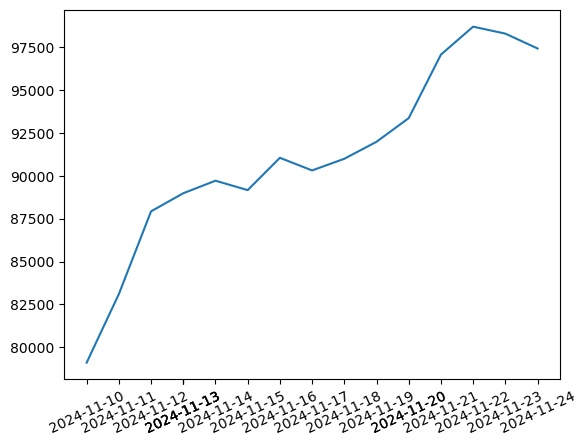

In [63]:
import matplotlib.pyplot as plt
plt.plot(merged_df["date"], merged_df["priceUsd"])
plt.xticks(merged_df["date"])
plt.xticks(rotation = 25)
plt.show()

In [64]:
import requests

def get_exchanges_for_crypto(crypto_id):
    url = f"http://api.coincap.io/v2/markets?assetId={crypto_id}"
    
    try:
        response = requests.get(url)
        response.raise_for_status()
        data = response.json()
        exchanges = set()
        for market in data.get('data', []):
            exchanges.add(market.get('exchangeId'))

        return exchanges

    except requests.exceptions.RequestException as e:
        print(f"An error occurred: {e}")
        return None
    
crypto_id = "bitcoin".lower()
exchanges = get_exchanges_for_crypto(crypto_id)
print(f"Exchanges for {crypto_id}: {exchanges}")

Exchanges for bitcoin: {'alterdice', 'bilaxy', 'bibox', 'bigone', 'binance'}
